# Data Preprocessing

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df_og = pd.read_csv("/content/one_hot.csv")

In [ ]:
df_og.head(5)

,Name,# of Positions,Degree,Course,College,CGPA,HSC,SSC,Additional Info,# of tech skills,...,Public Relations,Public Speaking,Recruitment,Report Writing,Risk Management,Sales,Strategic Planning,Team Building,Time Management,Vendor Management
0,Vaishnavi Arolkar,5,Bachelor of Technology,Electronics Engineering,Sardar Patel Institute of Technology,8.77,NaN,NaN,"{'Key Values': {'cgpa': '8.77', 'skills': 'Tim...",13,...,0,0,0,0,0,0,0,0,1,0
1,Kundan Choudhary,0,Bachelor of Technology,Electronics Engineering,Sardar Patel Institute of Technology,7.20,NaN,NaN,"{'Key Values': {}, 'Languages': [], 'Certifica...",3,...,0,0,0,0,0,1,0,0,0,0
2,Vikram Choudhary,2,Bachelor of Technology,Electronics Engineering,Sardar Patel Institute of Technology,7.05,NaN,NaN,"{'Key Values': {'cgpa': '7.05'}, 'Languages': ...",11,...,0,0,0,0,0,0,0,0,0,0
3,Anushri Deshmukh,6,Bachelor of Technology,Electronics Engineering,Sardar Patel Institute of Technology,8.25,NaN,NaN,"{'Key Values': {'skills': 'Python, Java, HTML,...",11,...,0,0,0,0,0,0,0,0,1,0
4,Raj Gandhi,3,Bachelor of Technology,Electronics Engineering,Sardar Patel Institute of Technology,7.75,NaN,NaN,"{'Key Values': {'skills': 'OOPs,'}, 'Languages...",6,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# prompt: impute the 'CGPA' colums NaN values
df_og['CGPA'].fillna(df_og['CGPA'].median(), inplace=True)
df_og.head(5)

,Name,# of Positions,Degree,Course,College,CGPA,HSC,SSC,Additional Info,# of tech skills,...,Public Relations,Public Speaking,Recruitment,Report Writing,Risk Management,Sales,Strategic Planning,Team Building,Time Management,Vendor Management
0,Vaishnavi Arolkar,5,Bachelor of Technology,Electronics Engineering,Sardar Patel Institute of Technology,8.77,NaN,NaN,"{'Key Values': {'cgpa': '8.77', 'skills': 'Tim...",13,...,0,0,0,0,0,0,0,0,1,0
1,Kundan Choudhary,0,Bachelor of Technology,Electronics Engineering,Sardar Patel Institute of Technology,7.20,NaN,NaN,"{'Key Values': {}, 'Languages': [], 'Certifica...",3,...,0,0,0,0,0,1,0,0,0,0
2,Vikram Choudhary,2,Bachelor of Technology,Electronics Engineering,Sardar Patel Institute of Technology,7.05,NaN,NaN,"{'Key Values': {'cgpa': '7.05'}, 'Languages': ...",11,...,0,0,0,0,0,0,0,0,0,0
3,Anushri Deshmukh,6,Bachelor of Technology,Electronics Engineering,Sardar Patel Institute of Technology,8.25,NaN,NaN,"{'Key Values': {'skills': 'Python, Java, HTML,...",11,...,0,0,0,0,0,0,0,0,1,0
4,Raj Gandhi,3,Bachelor of Technology,Electronics Engineering,Sardar Patel Institute of Technology,7.75,NaN,NaN,"{'Key Values': {'skills': 'OOPs,'}, 'Languages...",6,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#dropping college as all have same college
df_og = df_og.drop(['College'], axis = 1)
df_og.head(5)

,Name,# of Positions,Degree,Course,CGPA,HSC,SSC,Additional Info,# of tech skills,# of non tech skills,...,Public Relations,Public Speaking,Recruitment,Report Writing,Risk Management,Sales,Strategic Planning,Team Building,Time Management,Vendor Management
0,Vaishnavi Arolkar,5,Bachelor of Technology,Electronics Engineering,8.77,NaN,NaN,"{'Key Values': {'cgpa': '8.77', 'skills': 'Tim...",13,4,...,0,0,0,0,0,0,0,0,1,0
1,Kundan Choudhary,0,Bachelor of Technology,Electronics Engineering,7.20,NaN,NaN,"{'Key Values': {}, 'Languages': [], 'Certifica...",3,1,...,0,0,0,0,0,1,0,0,0,0
2,Vikram Choudhary,2,Bachelor of Technology,Electronics Engineering,7.05,NaN,NaN,"{'Key Values': {'cgpa': '7.05'}, 'Languages': ...",11,0,...,0,0,0,0,0,0,0,0,0,0
3,Anushri Deshmukh,6,Bachelor of Technology,Electronics Engineering,8.25,NaN,NaN,"{'Key Values': {'skills': 'Python, Java, HTML,...",11,4,...,0,0,0,0,0,0,0,0,1,0
4,Raj Gandhi,3,Bachelor of Technology,Electronics Engineering,7.75,NaN,NaN,"{'Key Values': {'skills': 'OOPs,'}, 'Languages...",6,2,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Columns to one-hot encode
columns_to_encode = ['Degree', 'Course']

# One-hot encode specific columns
df_og = pd.get_dummies(df_og, columns=columns_to_encode, drop_first=False)
df_og.head(5)

,Name,# of Positions,CGPA,HSC,SSC,Additional Info,# of tech skills,# of non tech skills,Role,Company,...,Sales,Strategic Planning,Team Building,Time Management,Vendor Management,Degree_Bachelor of Technology,Course_Computer Engineering,Course_Computer Networks,Course_Computer Science and Engineering,Course_Electronics Engineering
0,Vaishnavi Arolkar,5,8.77,NaN,NaN,"{'Key Values': {'cgpa': '8.77', 'skills': 'Tim...",13,4,SDE,Citius Tech,...,0,0,0,1,0,True,False,False,False,True
1,Kundan Choudhary,0,7.20,NaN,NaN,"{'Key Values': {}, 'Languages': [], 'Certifica...",3,1,SDE,Barclays,...,1,0,0,0,0,True,False,False,False,True
2,Vikram Choudhary,2,7.05,NaN,NaN,"{'Key Values': {'cgpa': '7.05'}, 'Languages': ...",11,0,Analyst,KPMG,...,0,0,0,0,0,True,False,False,False,True
3,Anushri Deshmukh,6,8.25,NaN,NaN,"{'Key Values': {'skills': 'Python, Java, HTML,...",11,4,Associate Consultant,Oracle,...,0,0,0,1,0,True,False,False,False,True
4,Raj Gandhi,3,7.75,NaN,NaN,"{'Key Values': {'skills': 'OOPs,'}, 'Languages...",6,2,SDE,BNP Paribas CIB,...,0,0,0,0,0,True,False,False,False,True


In [ ]:
#keeping name in df_og so that it can be used to see the final results
df_og = df_og.drop(['HSC', 'SSC', 'Additional Info'], axis = 1)
df = df_og.drop(['Name'], axis = 1)
df.head(5)

,# of Positions,CGPA,# of tech skills,# of non tech skills,Role,Company,AI,AWS,Agile,Amazon Web Services,...,Sales,Strategic Planning,Team Building,Time Management,Vendor Management,Degree_Bachelor of Technology,Course_Computer Engineering,Course_Computer Networks,Course_Computer Science and Engineering,Course_Electronics Engineering
0,5,8.77,13,4,SDE,Citius Tech,0,0,0,0,...,0,0,0,1,0,True,False,False,False,True
1,0,7.20,3,1,SDE,Barclays,0,0,0,0,...,1,0,0,0,0,True,False,False,False,True
2,2,7.05,11,0,Analyst,KPMG,0,0,0,0,...,0,0,0,0,0,True,False,False,False,True
3,6,8.25,11,4,Associate Consultant,Oracle,0,0,0,0,...,0,0,0,1,0,True,False,False,False,True
4,3,7.75,6,2,SDE,BNP Paribas CIB,0,0,0,0,...,0,0,0,0,0,True,False,False,False,True


In [ ]:
#duplicating to have more data
df_copy = df.copy()
df = pd.concat([df, df_copy], ignore_index=True)
df.head(5)

,# of Positions,CGPA,# of tech skills,# of non tech skills,Role,Company,AI,AWS,Agile,Amazon Web Services,...,Sales,Strategic Planning,Team Building,Time Management,Vendor Management,Degree_Bachelor of Technology,Course_Computer Engineering,Course_Computer Networks,Course_Computer Science and Engineering,Course_Electronics Engineering
0,5,8.77,13,4,SDE,Citius Tech,0,0,0,0,...,0,0,0,1,0,True,False,False,False,True
1,0,7.20,3,1,SDE,Barclays,0,0,0,0,...,1,0,0,0,0,True,False,False,False,True
2,2,7.05,11,0,Analyst,KPMG,0,0,0,0,...,0,0,0,0,0,True,False,False,False,True
3,6,8.25,11,4,Associate Consultant,Oracle,0,0,0,0,...,0,0,0,1,0,True,False,False,False,True
4,3,7.75,6,2,SDE,BNP Paribas CIB,0,0,0,0,...,0,0,0,0,0,True,False,False,False,True


In [ ]:
#creating 2 different models. 1 for role prediction, 1 for company.
X = df.drop(['Role', 'Company'], axis = 1)
Y_role = df['Role']
Y_company = df['Company']

# Model Training

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [ ]:
# One-hot encode Y_role and Y_company
ohe_role = OneHotEncoder(sparse=False)
Y_role_encoded = ohe_role.fit_transform(df[['Role']])

ohe_company = OneHotEncoder(sparse=False)
Y_company_encoded = ohe_company.fit_transform(df[['Company']])

# Train-test split
X_train, X_test, Y_role_train, Y_role_test = train_test_split(X, Y_role_encoded, test_size=0.2, random_state=42)
X_train_comp, X_test_comp, Y_company_train, Y_company_test = train_test_split(X, Y_company_encoded, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Role Prediction Model

In [ ]:
# Define the model for Role Prediction
role_model = Sequential()
role_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
role_model.add(Dense(32, activation='relu'))
role_model.add(Dense(Y_role_encoded.shape[1], activation='sigmoid'))

# Compile and train the role prediction model
role_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
role_model.fit(X_train, Y_role_train, epochs=10, batch_size=32, validation_data=(X_test, Y_role_test))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.0068 - loss: 0.7140 - val_accuracy: 0.0189 - val_loss: 0.6490
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0146 - loss: 0.6217 - val_accuracy: 0.0755 - val_loss: 0.5598
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0183 - loss: 0.5316 - val_accuracy: 0.0377 - val_loss: 0.4745
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0386 - loss: 0.4461 - val_accuracy: 0.0566 - val_loss: 0.3949
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0648 - loss: 0.3691 - val_accuracy: 0.0566 - val_loss: 0.3221
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0624 - loss: 0.2994 - val_accuracy: 0.0566 - val_loss: 0.2573
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0641 - loss: 0.2388 - val_accuracy: 0.0566 - val_loss: 0.2014
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0513 - loss: 0.1807 - val_accuracy: 0.1132 - val_loss: 0.1572
Epoch 9/10
7/7 ━━━

Company Prediction Model

In [ ]:
# Define the model for Company Prediction
company_model = Sequential()
company_model.add(Dense(64, activation='relu', input_shape=(X_train_comp.shape[1],)))
company_model.add(Dense(32, activation='relu'))
company_model.add(Dense(Y_company_encoded.shape[1], activation='sigmoid'))

# Compile and train the company prediction model
company_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
company_model.fit(X_train_comp, Y_company_train, epochs=10, batch_size=32, validation_data=(X_test_comp, Y_company_test))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.0105 - loss: 0.7232 - val_accuracy: 0.0000e+00 - val_loss: 0.6473
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0087 - loss: 0.6277 - val_accuracy: 0.0000e+00 - val_loss: 0.5627
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0030 - loss: 0.5404 - val_accuracy: 0.0000e+00 - val_loss: 0.4627
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0037 - loss: 0.4365 - val_accuracy: 0.0000e+00 - val_loss: 0.3461
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0062 - loss: 0.3241 - val_accuracy: 0.0000e+00 - val_loss: 0.2373
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0137 - loss: 0.2185 - val_accuracy: 0.0000e+00 - val_loss: 0.1597
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0105 - loss: 0.1523 - val_accuracy: 0.0000e+00 - val_loss: 0.1191
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0048 - loss: 0.1131 - val_accuracy: 0.0943 - v

In [ ]:
# Save the models and encoders
role_model.save('role_model.h5')
company_model.save('company_model.h5')
joblib.dump(ohe_role, 'ohe_role.pkl')
joblib.dump(ohe_company, 'ohe_company.pkl')

['ohe_company.pkl']

# Model Evaluation

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

Job Role Model

In [ ]:
# Evaluate Role Prediction Model
role_predictions = role_model.predict(X_test)
role_predictions_binary = (role_predictions > 0.5).astype(int)

# Calculate accuracy and confusion matrix
role_accuracy = accuracy_score(np.argmax(Y_role_test, axis=1), np.argmax(role_predictions_binary, axis=1))
role_conf_matrix = confusion_matrix(np.argmax(Y_role_test, axis=1), np.argmax(role_predictions_binary, axis=1))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [ ]:
# Inspect the content and type of target_names_role
print("Target names role content:")
print(ohe_role.categories_[0])
print("Type of each element in target_names_role:")
print([type(name) for name in ohe_role.categories_[0]])

# Convert to list of strings if necessary
target_names_role = [str(name) for name in ohe_role.categories_[0]]

print("Converted target names role content:")
print(target_names_role)

Target names role content:
['Analyst' 'Analyst ' 'Application Developer'
 'Application Support Specialist' 'Assistant Product Manager'
 'Associate Consultant' 'Associate Consultant ' 'Associate Developer'
 'Associate Developer ' 'Associate SDE ' 'Associate Solution Consultant '
 'Backend Developer ' 'Business Analyst' 'Cloud DevOps Engineer'
 'Consultant' 'Corporate Investment Banking (CIB)'
 'Corporate Investment Banking Intern' 'Cyber Security Engineer '
 'Data Analyst' 'Data Analyst ' 'Data Engineer'
 'Digital technology intern' 'Engineer Intern' "Founder's office intern"
 'Framework Engineer' 'Full Stack Intern' 'HR Manager' 'ITD'
 'Junior Analyst' 'Machine Learning Engineer' 'Research Intern' 'SDE'
 'SDE ' 'Senior Analyst ' 'Senior Systems Engineer' 'Software Engineer'
 'Software Engineer ' 'Software Quality Assurance Engineer'
 'Software developer ' 'Technical Architect' 'Technology Analyst'
 'Technology Analyst ' 'Technology Analyst (SDE)'
 'Technology Graduate Developer ' 'Tech

In [ ]:
# Generate classification report
role_class_report = classification_report(
    np.argmax(Y_role_test, axis=1),
    np.argmax(role_predictions_binary, axis=1),
    target_names=target_names_role,
    labels=np.arange(len(target_names_role)),
    zero_division=0
)

print(f"Role Prediction Model Accuracy: {role_accuracy}")
print("Role Prediction Model Confusion Matrix:")
print(role_conf_matrix)
print("Role Prediction Model Classification Report:")
print(role_class_report)

Role Prediction Model Accuracy: 0.05660377358490566
Role Prediction Model Confusion Matrix:
[[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0 

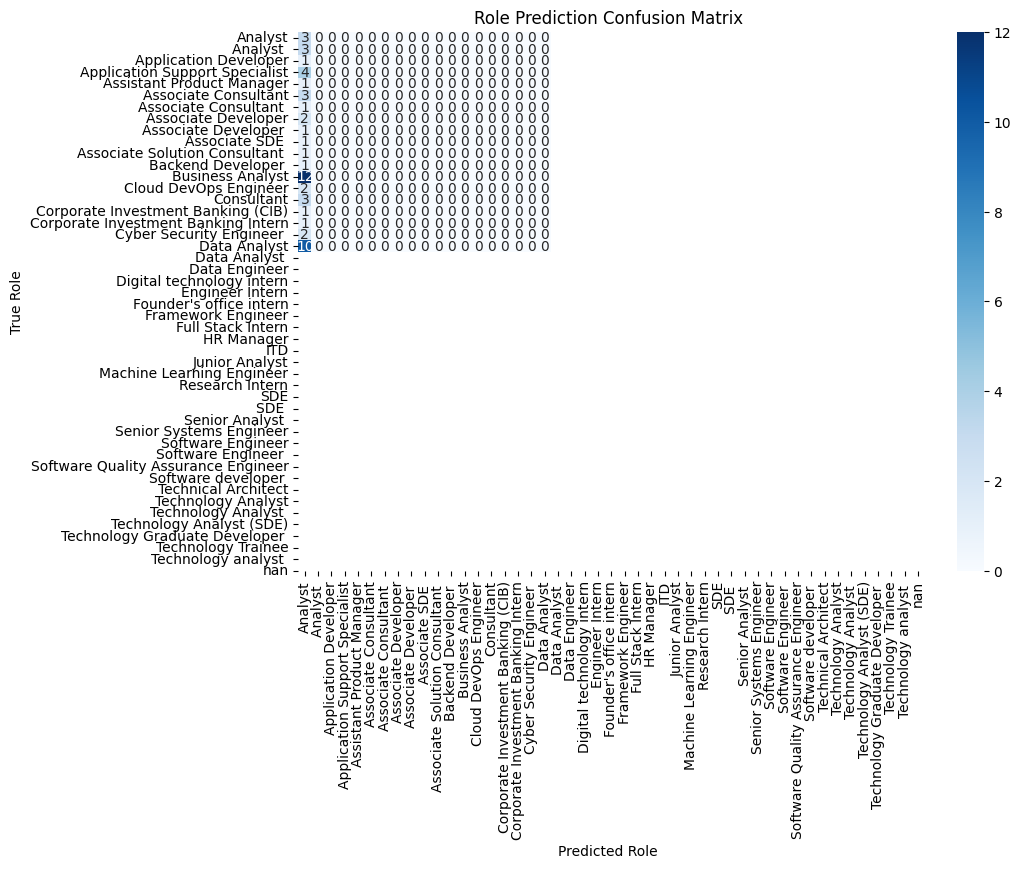

In [ ]:
# Plot confusion matrix for Role Prediction
plt.figure(figsize=(10, 7))
sns.heatmap(role_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names_role, yticklabels=target_names_role)
plt.xlabel('Predicted Role')
plt.ylabel('True Role')
plt.title('Role Prediction Confusion Matrix')
plt.show()

Company Model

In [ ]:
# Evaluate Company Prediction Model
company_predictions = company_model.predict(X_test_comp)
company_predictions_binary = (company_predictions > 0.5).astype(int)

# Calculate accuracy and confusion matrix
company_accuracy = accuracy_score(np.argmax(Y_company_test, axis=1), np.argmax(company_predictions_binary, axis=1))
company_conf_matrix = confusion_matrix(np.argmax(Y_company_test, axis=1), np.argmax(company_predictions_binary, axis=1))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [ ]:
# Inspect the content and type of target_names_company
print("Target names company content:")
print(ohe_company.categories_[0])
print("Type of each element in target_names_company:")
print([type(name) for name in ohe_company.categories_[0]])

Target names company content:
['AIM4U Software Solutions ' 'Accolite' 'BNP Paribas' 'BNP Paribas CIB'
 'Baker Huges' 'Baker Hughes' 'Barclays' 'Barclays ' 'Bloomberg' 'Buyceps'
 'Carwale' 'Cash Rich' 'Cimpress' 'Citius Tech'
 'Clearing corporation of India Limited' 'Colgate - Plamolive'
 'Dassault Systèmes' 'Deutsche Bank ' 'EDS' 'EDS(Equity Data Science)'
 'EmerTech Innovations ' 'Equity Data Science ' 'FYNDNA TechCorp'
 'Female Cricket' 'Flipkart' 'GEP Worldwide' 'Godrej Capital'
 'HERE Technologies' 'ICICI ' 'IDfy' 'ISS' 'ISS ' 'Infosys' 'JPMC' 'KCDH'
 'KPMG' 'MSCI' 'Nomura' 'Nomura ' 'OMP' 'Oracle' 'Parrami Finance '
 'PhonePe' 'Prodigy Tech' 'Quantiphi' 'RBL Bank' 'Resosoft Services LLP'
 'Think360.ai' 'TransUnion' 'Transunion' 'Transunioun'
 'Wohling Transformations' 'WorkIndia' 'WorkIndia ' nan]
Type of each element in target_names_company:
[<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <cla

In [ ]:
# Convert to list of strings if necessary
target_names_company = [str(name) for name in ohe_company.categories_[0]]

print("Converted target names company content:")
print(target_names_company)

Converted target names company content:
['AIM4U Software Solutions ', 'Accolite', 'BNP Paribas', 'BNP Paribas CIB', 'Baker Huges', 'Baker Hughes', 'Barclays', 'Barclays ', 'Bloomberg', 'Buyceps', 'Carwale', 'Cash Rich', 'Cimpress', 'Citius Tech', 'Clearing corporation of India Limited', 'Colgate - Plamolive', 'Dassault Systèmes', 'Deutsche Bank ', 'EDS', 'EDS(Equity Data Science)', 'EmerTech Innovations ', 'Equity Data Science ', 'FYNDNA TechCorp', 'Female Cricket', 'Flipkart', 'GEP Worldwide', 'Godrej Capital', 'HERE Technologies', 'ICICI ', 'IDfy', 'ISS', 'ISS ', 'Infosys', 'JPMC', 'KCDH', 'KPMG', 'MSCI', 'Nomura', 'Nomura ', 'OMP', 'Oracle', 'Parrami Finance ', 'PhonePe', 'Prodigy Tech', 'Quantiphi', 'RBL Bank', 'Resosoft Services LLP', 'Think360.ai', 'TransUnion', 'Transunion', 'Transunioun', 'Wohling Transformations', 'WorkIndia', 'WorkIndia ', 'nan']


In [ ]:
# Generate classification report
company_class_report = classification_report(
    np.argmax(Y_company_test, axis=1),
    np.argmax(company_predictions_binary, axis=1),
    target_names=target_names_company,
    labels=np.arange(len(target_names_company)),
    zero_division=0
)

print(f"Company Prediction Model Accuracy: {company_accuracy}")
print("Company Prediction Model Confusion Matrix:")
print(company_conf_matrix)
print("Company Prediction Model Classification Report:")
print(company_class_report)

Company Prediction Model Accuracy: 0.018867924528301886
Company Prediction Model Confusion Matrix:
[[ 1  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 ...
 [ 3  0  0 ...  0  0  0]
 [ 2  0  0 ...  0  0  0]
 [10  0  0 ...  0  0  0]]
Company Prediction Model Classification Report:
                                       precision    recall  f1-score   support

            AIM4U Software Solutions        0.02      1.00      0.04         1
                             Accolite       0.00      0.00      0.00         1
                          BNP Paribas       0.00      0.00      0.00         1
                      BNP Paribas CIB       0.00      0.00      0.00         0
                          Baker Huges       0.00      0.00      0.00         0
                         Baker Hughes       0.00      0.00      0.00         0
                             Barclays       0.00      0.00      0.00         0
                            Barclays        0.00      0.00      

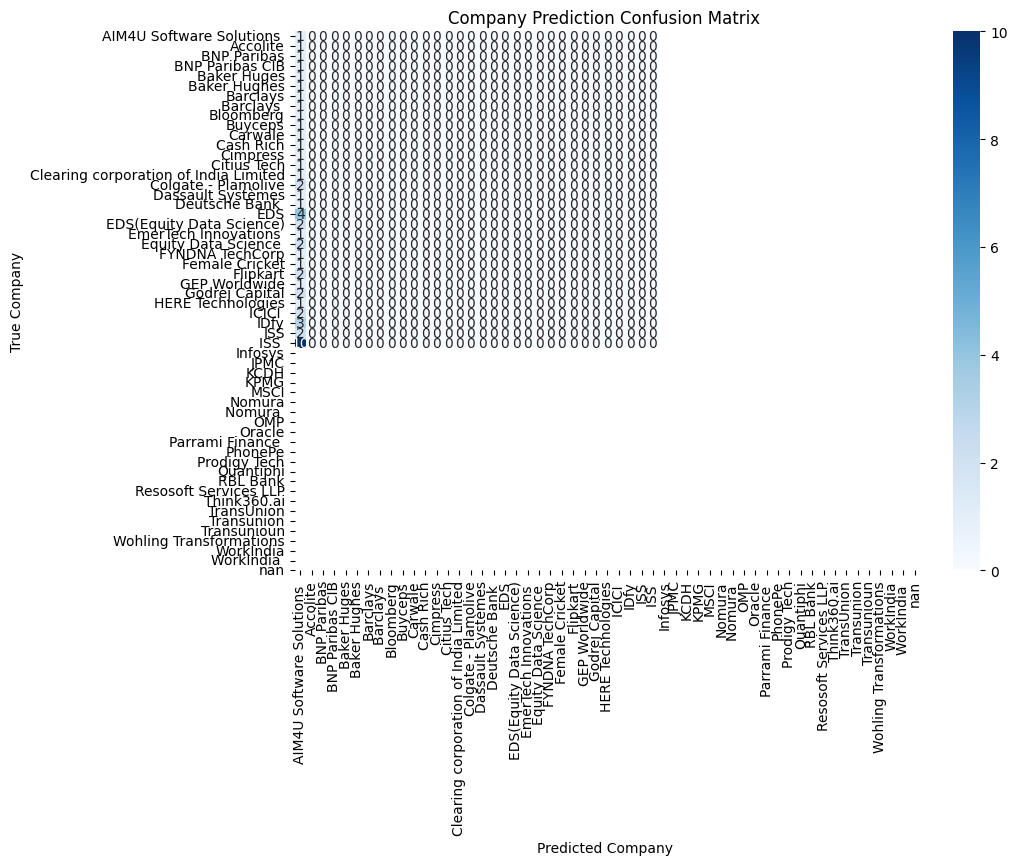

In [ ]:
# Plot confusion matrix for Company Prediction
plt.figure(figsize=(10, 7))
sns.heatmap(company_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names_company, yticklabels=target_names_company)
plt.xlabel('Predicted Company')
plt.ylabel('True Company')
plt.title('Company Prediction Confusion Matrix')
plt.show()

# Model Output According to Name

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from keras.models import load_model

In [ ]:
# Load your trained models
role_model = load_model('role_model.h5')
company_model = load_model('company_model.h5')

In [ ]:
# Define preprocessing function (assuming you have the same preprocessing steps)
def preprocess_input(df, name):
    # Extract the data for the given name
    data = df[df['Name'] == name]
    if data.empty:
        raise ValueError(f"No data found for the name: {name}")

    # Drop the non-numeric columns that are not used for prediction
    X_data = data.drop(['Name', 'Role', 'Company'], axis=1)
    return X_data

In [ ]:
# Define function to get top N predictions
def get_top_n_predictions(predictions, target_names, top_n=5):
    # Get probabilities and indices of the top N predictions
    probs = np.squeeze(predictions)
    top_indices = np.argsort(probs)[-top_n:][::-1]
    top_probs = probs[top_indices]
    top_names = np.array(target_names)[top_indices]

    return list(zip(top_names, top_probs))

In [ ]:
# Define function to predict top roles and companies
def predict_for_name(df, name, role_model, company_model, ohe_role, ohe_company, top_n=5):
    # Preprocess input
    X_data = preprocess_input(df, name)

    # Predict probabilities
    role_predictions = role_model.predict(X_data)
    company_predictions = company_model.predict(X_data)

    # Get top N predictions for roles and companies
    target_names_role = list(ohe_role.categories_[0])
    target_names_company = list(ohe_company.categories_[0])

    top_roles = get_top_n_predictions(role_predictions, target_names_role, top_n)
    top_companies = get_top_n_predictions(company_predictions, target_names_company, top_n)

    return top_roles, top_companies

In [ ]:
# Example usage
name = "Basuri Bhujade"  # Replace with the name you want to search for
top_roles, top_companies = predict_for_name(df_og, name, role_model, company_model, ohe_role, ohe_company)

print(f"Top 5 Roles for {name}:")
for role, prob in top_roles:
    print(f"Role: {role}, Probability: {prob:.4f}")

print(f"Top 5 Companies for {name}:")
for company, prob in top_companies:
    print(f"Company: {company}, Probability: {prob:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Top 5 Roles for Basuri Bhujade:
Role: nan, Probability: 0.2102
Role: Technology Analyst, Probability: 0.1340
Role: Cyber Security Engineer , Probability: 0.1286
Role: Software Quality Assurance Engineer, Probability: 0.1090
Role: Software Engineer, Probability: 0.1057
Top 5 Companies for Basuri Bhujade:
Company: nan, Probability: 0.2486
Company: JPMC, Probability: 0.0604
Company: Oracle, Probability: 0.0579
Company: Transunion, Probability: 0.0515
Company: Barclays, Probability: 0.0476


In [ ]:
# Example usage
name = "Kundan Choudhary"  # Replace with the name you want to search for
top_roles, top_companies = predict_for_name(df_og, name, role_model, company_model, ohe_role, ohe_company)

print(f"Top 5 Roles for {name}:")
for role, prob in top_roles:
    print(f"Role: {role}, Probability: {prob:.4f}")

print(f"Top 5 Companies for {name}:")
for company, prob in top_companies:
    print(f"Company: {company}, Probability: {prob:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Top 5 Roles for Kundan Choudhary:
Role: Software Engineer, Probability: 0.3473
Role: nan, Probability: 0.3214
Role: Business Analyst, Probability: 0.2807
Role: Software Quality Assurance Engineer, Probability: 0.2095
Role: Cyber Security Engineer , Probability: 0.1940
Top 5 Companies for Kundan Choudhary:
Company: nan, Probability: 0.3162
Company: Transunion, Probability: 0.1956
Company: KCDH, Probability: 0.1278
Company: Barclays, Probability: 0.1197
Company: Prodigy Tech, Probability: 0.1190


In [ ]:
# Example usage
name = "Arjun Haridas"  # Replace with the name you want to search for
top_roles, top_companies = predict_for_name(df_og, name, role_model, company_model, ohe_role, ohe_company)

print(f"Top 5 Roles for {name}:")
for role, prob in top_roles:
    print(f"Role: {role}, Probability: {prob:.4f}")

print(f"Top 5 Companies for {name}:")
for company, prob in top_companies:
    print(f"Company: {company}, Probability: {prob:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Top 5 Roles for Arjun Haridas:
Role: nan, Probability: 0.2891
Role: Software Engineer, Probability: 0.2796
Role: Business Analyst, Probability: 0.1847
Role: Software Quality Assurance Engineer, Probability: 0.1747
Role: Cyber Security Engineer , Probability: 0.1683
Top 5 Companies for Arjun Haridas:
Company: nan, Probability: 0.2307
Company: Transunion, Probability: 0.1446
Company: KCDH, Probability: 0.0960
Company: JPMC, Probability: 0.0824
Company: Barclays, Probability: 0.0814
